# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from sklearn.cluster import OPTICS
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
d1 = pd.read_excel('data.xlsx',0)

In [3]:
d1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
d2 = pd.read_excel('data.xlsx',1)

In [5]:
d2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The following code is used to merge two sheets into one dataset.

In [6]:
data_df = pd.concat([d1,d2])

# EDA

In [7]:
pd.set_option('display.max_rows', None)
data_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [8]:
data_df.shape

(1067371, 8)

In [9]:
data_df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [11]:
data_df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Missing values are dropped as the dataset is large enough to carryout the required analysis.

In [12]:
data_df.dropna(inplace=True)

In [13]:
data_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

label_encoder = LabelEncoder()
data_df = label_encoder.fit_transform(data_df['Country'])

data_df.head()

As we have a large dataset, the focus will be based on the United Kingdom region as the majority of orders are based on the United Kingdom for a more robust analysis, as well as for the benefit of overtime comparative analysis.

In [14]:
data_df = data_df[data_df['Country'] == 'United Kingdom']


In [15]:
data_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741301 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      741301 non-null  object        
 1   StockCode    741301 non-null  object        
 2   Description  741301 non-null  object        
 3   Quantity     741301 non-null  int64         
 4   InvoiceDate  741301 non-null  datetime64[ns]
 5   Price        741301 non-null  float64       
 6   Customer ID  741301 non-null  float64       
 7   Country      741301 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 50.9+ MB


In [17]:
data_df.shape

(741301, 8)

In [18]:
for col in data_df.columns:
    print(col, data_df[col].unique())

Invoice [489434 489435 489436 ... 581584 581585 581586]
StockCode [85048 '79323P' '79323W' ... 23562 23561 23843]
Description ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'SILVER AND BLACK ORBIT NECKLACE'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity [    12     48     24     10     18      3     16      4      2      6
      8      1     28     30     60     32     56     36     20     -3
     -2    576    288     27     64    160     -6      5     -1     72
     50      7     25    800    -12      9     11     -4     58    192
     96    144    100    180    216     15    240    108     33     90
     81    -24    -81    -48     17     -5     -8     -9     13     21
    120    200    168     19    280    128     40     80    300    450
     14     61     46    504     45    480   4320   5184   4008     22
    600    505    500     23     47    432    252     75   -504   -600
   -252   -246    -36    360    107

Country ['United Kingdom']


As the dataset is large, it is sampled randomly to smaller size to be able to carry out the required analysis, as the computer is unable or takes too long to process the dataset.

In [19]:
sample_data = 30000  
random_data_df = data_df.sample(n=sample_data, random_state=42)

In [20]:
random_data_df.shape

(30000, 8)

In [21]:
random_data_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,United Kingdom
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,United Kingdom
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,United Kingdom
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,United Kingdom
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,United Kingdom


To understand the dataset and the uniqueness of each feature, the following code is used on all coumns.

In [22]:
random_data_df['Description'].nunique()

3787

In [23]:
random_data_df['Description'].nunique()

3787

In [24]:
random_data_df['Invoice'].nunique()

16282

In [25]:
random_data_df['StockCode'].nunique()

3485

In [26]:
random_data_df['Quantity'].nunique()

158

In [27]:
random_data_df['InvoiceDate'].nunique()

15819

In [28]:
random_data_df['Price'].nunique()

235

In [29]:
random_data_df['Customer ID'].nunique()

4077

In [30]:
random_data_df['Country'].nunique()

1

In [31]:
random_data_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,United Kingdom
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,United Kingdom
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,United Kingdom
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,United Kingdom
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,United Kingdom
389867,526890,22383,LUNCH BAG SUKI DESIGN,10,2010-10-13 14:40:00,1.65,15032.0,United Kingdom
399872,527655,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-10-18 14:07:00,1.45,13387.0,United Kingdom
459242,575870,21616,4 PEAR BOTANICAL DINNER CANDLES,12,2011-11-11 12:46:00,1.25,15557.0,United Kingdom
275345,516161,21747,SMALL SKULL WINDMILL,1,2010-07-18 12:01:00,1.25,14563.0,United Kingdom
520799,537781,22837,HOT WATER BOTTLE BABUSHKA,1,2010-12-08 12:46:00,4.65,17341.0,United Kingdom


# Encoding Features

The following code is used to capture time based patterns in the data, which might be relevant for both clustering and market basket analysis.

In [32]:
random_data_df['InvoiceDate'] = pd.to_datetime(random_data_df['InvoiceDate'])

random_data_df['Year'] = random_data_df['InvoiceDate'].dt.year
random_data_df['Month'] = random_data_df['InvoiceDate'].dt.month
random_data_df['Day'] = random_data_df['InvoiceDate'].dt.day
random_data_df['Hour'] = random_data_df['InvoiceDate'].dt.hour

In [33]:
random_data_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Hour
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,United Kingdom,2011,6,28,14
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,United Kingdom,2010,11,16,12
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,United Kingdom,2010,7,7,13
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,United Kingdom,2011,7,28,18
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,United Kingdom,2011,10,26,16


In [34]:
label_encoder = LabelEncoder()
random_data_df['Country_Encoded'] = label_encoder.fit_transform(random_data_df['Country'])


In [35]:
random_data_df.drop(columns='Country', inplace=True)

In [36]:
random_data_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,Country_Encoded
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,2011,6,28,14,0
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,2010,11,16,12,0
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,2010,7,7,13,0
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,2011,7,28,18,0
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,2011,10,26,16,0
389867,526890,22383,LUNCH BAG SUKI DESIGN,10,2010-10-13 14:40:00,1.65,15032.0,2010,10,13,14,0
399872,527655,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-10-18 14:07:00,1.45,13387.0,2010,10,18,14,0
459242,575870,21616,4 PEAR BOTANICAL DINNER CANDLES,12,2011-11-11 12:46:00,1.25,15557.0,2011,11,11,12,0
275345,516161,21747,SMALL SKULL WINDMILL,1,2010-07-18 12:01:00,1.25,14563.0,2010,7,18,12,0
520799,537781,22837,HOT WATER BOTTLE BABUSHKA,1,2010-12-08 12:46:00,4.65,17341.0,2010,12,8,12,0


Feature Selection

To identify patterns within the dataset, specific features are selected to perform clustering. Clustering based on customer behavior can be useful for understanding customer preferences. Quantity is used to identify segments based on purchasing behavior. Price provide insights into the purchasing power of customers and their preferences for different price ranges. Country_Encoded help in understanding consumer behavior based on geographic charcteristics. Year and Month provides insight into the seasonal trends and variations of consumers interst. 

In [37]:
features = ['Customer ID','Quantity', 'Price', 'Year', 'Month', 'Country_Encoded']
X = random_data_df[features]

Scaling the data

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering

### KMeans Clustering

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [40]:
inertia_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

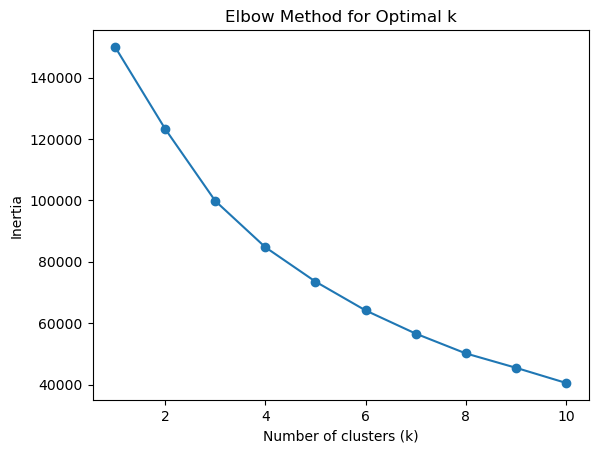

In [41]:
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [42]:
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print("Silhouette Score (KMeans):", silhouette_kmeans)

Silhouette Score (KMeans): 0.2928875639216419


In [43]:
random_data_df['KMeans_cluster'] = kmeans_labels

In [44]:
random_data_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,Country_Encoded,KMeans_cluster
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,2011,6,28,14,0,0
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,2010,11,16,12,0,2
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,2010,7,7,13,0,2
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,2011,7,28,18,0,0
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,2011,10,26,16,0,0
389867,526890,22383,LUNCH BAG SUKI DESIGN,10,2010-10-13 14:40:00,1.65,15032.0,2010,10,13,14,0,2
399872,527655,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-10-18 14:07:00,1.45,13387.0,2010,10,18,14,0,2
459242,575870,21616,4 PEAR BOTANICAL DINNER CANDLES,12,2011-11-11 12:46:00,1.25,15557.0,2011,11,11,12,0,0
275345,516161,21747,SMALL SKULL WINDMILL,1,2010-07-18 12:01:00,1.25,14563.0,2010,7,18,12,0,2
520799,537781,22837,HOT WATER BOTTLE BABUSHKA,1,2010-12-08 12:46:00,4.65,17341.0,2010,12,8,12,0,2


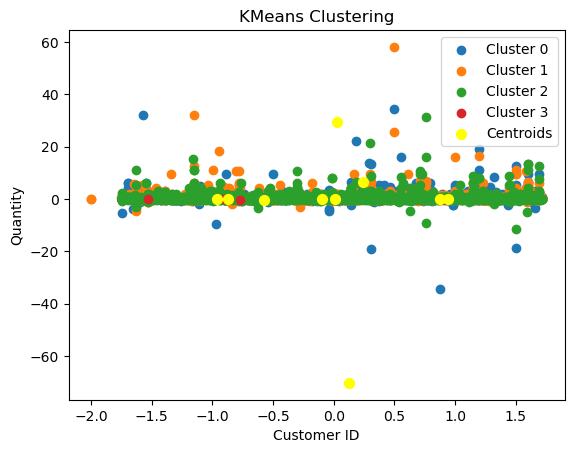

In [45]:
def plotFeatures(col1, col2):
    for cluster_label in np.unique(kmeans_labels):
        plt.scatter(
            X_scaled[kmeans_labels == cluster_label, col1],
            X_scaled[kmeans_labels == cluster_label, col2],
            label=f'Cluster {cluster_label}',
            cmap='viridis'
        )
    plt.scatter(
        kmeans.cluster_centers_[:, col1],
        kmeans.cluster_centers_[:, col2],
        s=50,
        c='yellow',
        label='Centroids'
    )
    plt.xlabel(features[col1])
    plt.ylabel(features[col2])
    plt.title('KMeans Clustering')
    plt.legend()
    plt.show()

plotFeatures(0, 1) 

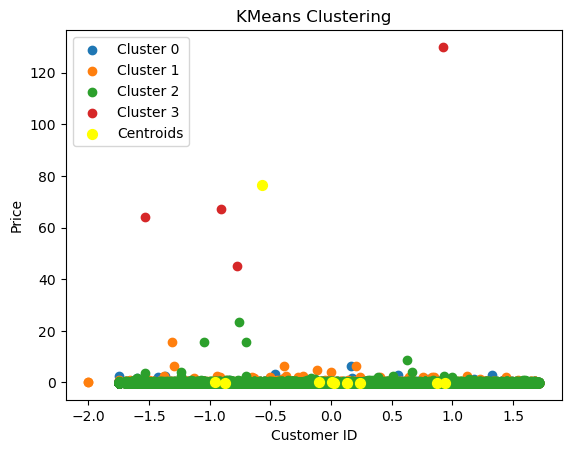

In [46]:
plotFeatures(0, 2)

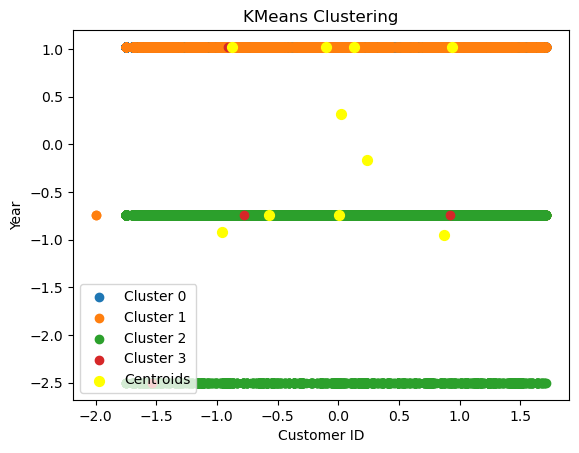

In [47]:
plotFeatures(0, 3)

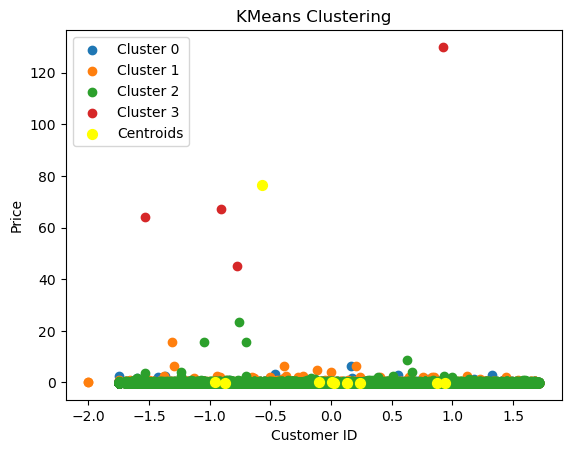

In [48]:
plotFeatures(0, 2)

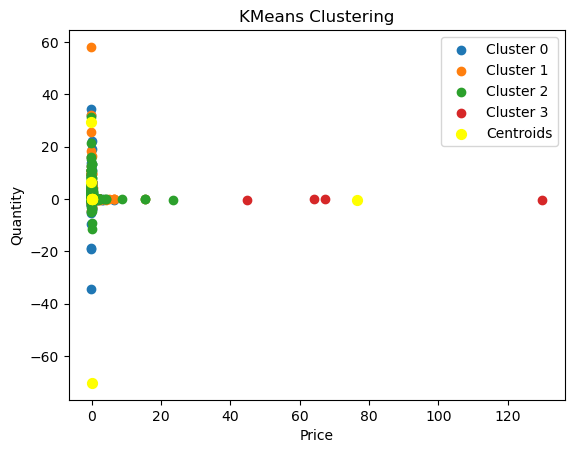

In [49]:
plotFeatures(2, 1)

### KMedoids Clustering

In [50]:
kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

In [51]:
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
print("Silhouette Score (KMedoids):", silhouette_kmedoids)

Silhouette Score (KMedoids): 0.20799743231219167


In [52]:
random_data_df['KMedoids_cluster'] = kmedoids_labels

In [53]:
random_data_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,Country_Encoded,KMeans_cluster,KMedoids_cluster
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,2011,6,28,14,0,0,2
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,2010,11,16,12,0,2,1
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,2010,7,7,13,0,2,1
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,2011,7,28,18,0,0,2
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,2011,10,26,16,0,0,2


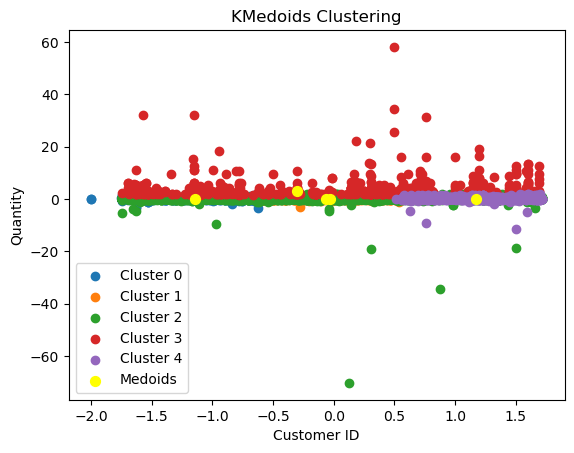

In [54]:
def plotKMedoids(col1, col2):
    for cluster_label in np.unique(kmedoids_labels):
        plt.scatter(
            X_scaled[kmedoids_labels == cluster_label, col1],
            X_scaled[kmedoids_labels == cluster_label, col2],
            label=f'Cluster {cluster_label}',
            cmap='viridis'
        )
    plt.scatter(
        kmedoids.cluster_centers_[:, col1],
        kmedoids.cluster_centers_[:, col2],
        s=50,
        c='yellow',
        label='Medoids'
    )
    plt.xlabel(features[col1])
    plt.ylabel(features[col2])
    plt.title('KMedoids Clustering')
    plt.legend()
    plt.show()

plotKMedoids(0, 1)

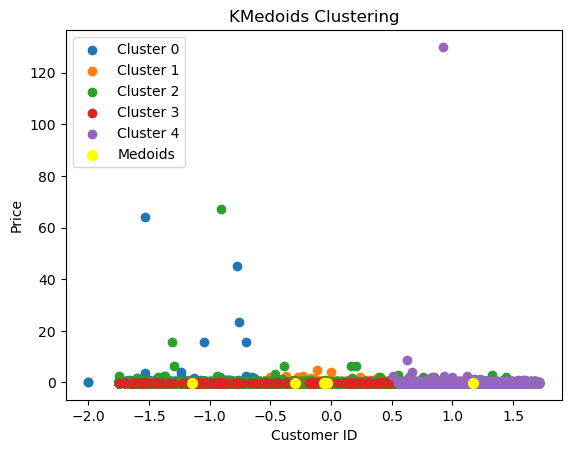

In [55]:
plotKMedoids(0, 2)

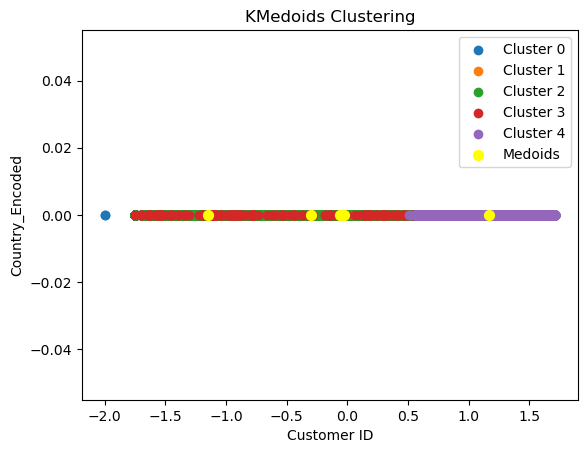

In [56]:
plotKMedoids(0, 5)

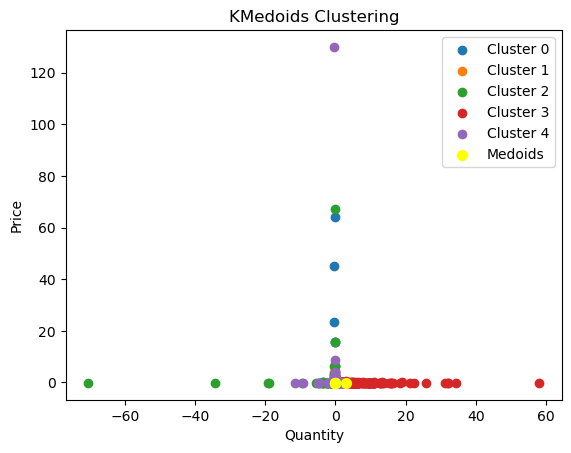

In [57]:
plotKMedoids(1, 2)

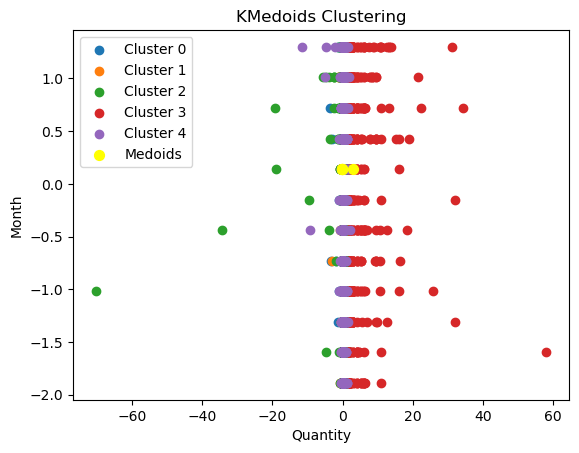

In [58]:
plotKMedoids(1, 4)

In [59]:
import hdbscan

In [60]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [61]:
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)

Silhouette Score (DBSCAN): 0.18636114508507107


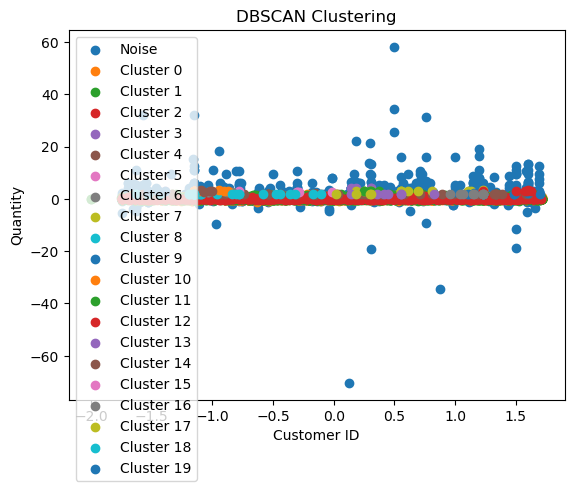

In [62]:
def plotDBSCAN(col1, col2):
    for cluster_label in np.unique(dbscan_labels):
        if cluster_label == -1:
            plt.scatter(
                X_scaled[dbscan_labels == cluster_label, col1],
                X_scaled[dbscan_labels == cluster_label, col2],
                label=f'Noise',
                cmap='viridis'
            )
        else:
            plt.scatter(
                X_scaled[dbscan_labels == cluster_label, col1],
                X_scaled[dbscan_labels == cluster_label, col2],
                label=f'Cluster {cluster_label}',
                cmap='viridis'
            )
    plt.xlabel(features[col1])
    plt.ylabel(features[col2])
    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.show()

plotDBSCAN(0, 1)

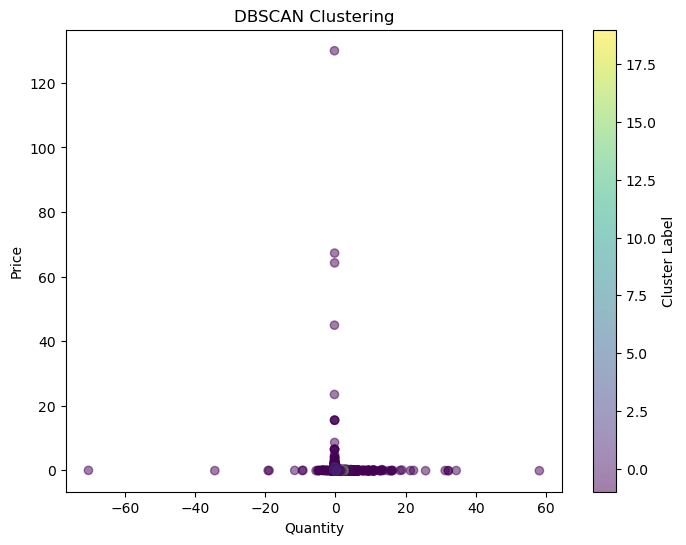

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.colorbar(label='Cluster Label')
plt.show()

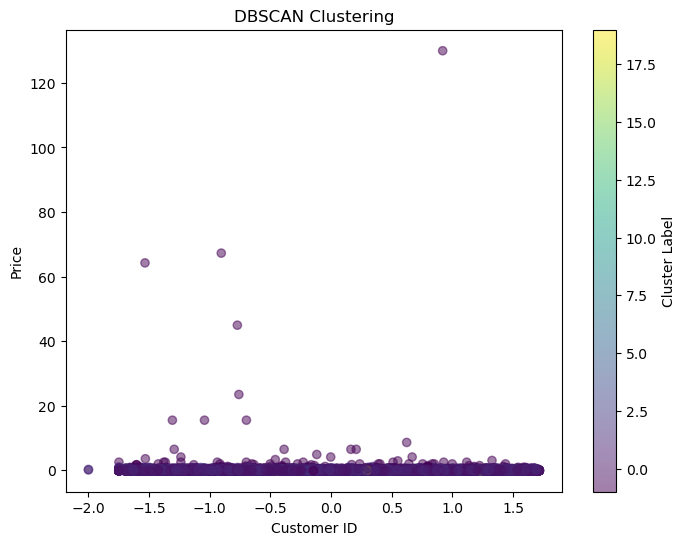

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Customer ID')
plt.ylabel('Price')
plt.colorbar(label='Cluster Label')
plt.show()

### HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

In [65]:
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=4)
hdbscan_labels = hdbscan_clusterer.fit_predict(X_scaled)

In [66]:
random_data_df['DBSCAN_cluster'] = dbscan_labels

In [67]:
silhouette_hdbscan = silhouette_score(X_scaled, hdbscan_labels)
print("Silhouette Score (HDBSCAN):", silhouette_hdbscan)

Silhouette Score (HDBSCAN): -0.16342432643765709


In [68]:
random_data_df['HDBSCAN_cluster'] = hdbscan_labels

In [69]:
random_data_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,Country_Encoded,KMeans_cluster,KMedoids_cluster,DBSCAN_cluster,HDBSCAN_cluster
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,2011,6,28,14,0,0,2,0,530
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,2010,11,16,12,0,2,1,1,-1
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,2010,7,7,13,0,2,1,1,767
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,2011,7,28,18,0,0,2,0,534
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,2011,10,26,16,0,0,2,0,1140


### OPTICS Clustering

In [70]:
optics_clusterer = OPTICS(min_samples=4, xi=0.05)
optics_clusterer.fit(X_scaled)
optics_labels = optics_clusterer.labels_

In [71]:
silhouette_optics = silhouette_score(X_scaled, optics_labels)
print("Silhouette Score (OPTICS):", silhouette_optics)

Silhouette Score (OPTICS): -0.17723032998615937


In [72]:
random_data_df['OPTICS_cluster'] = optics_labels

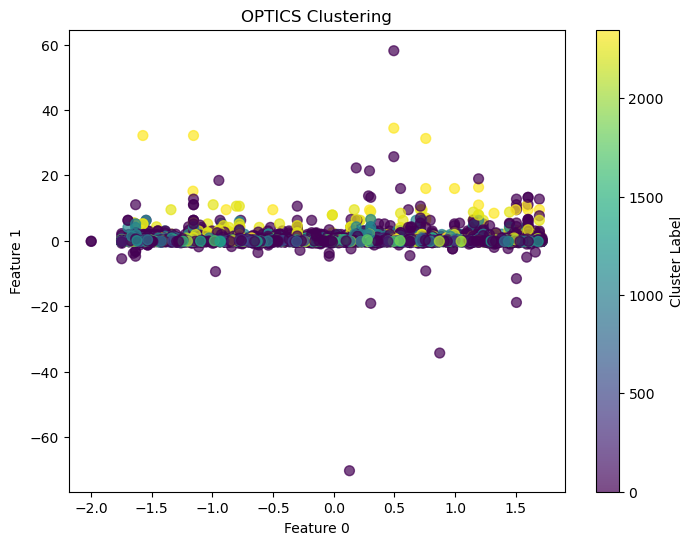

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=optics_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('OPTICS Clustering')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.colorbar(label='Cluster Label')
plt.show()

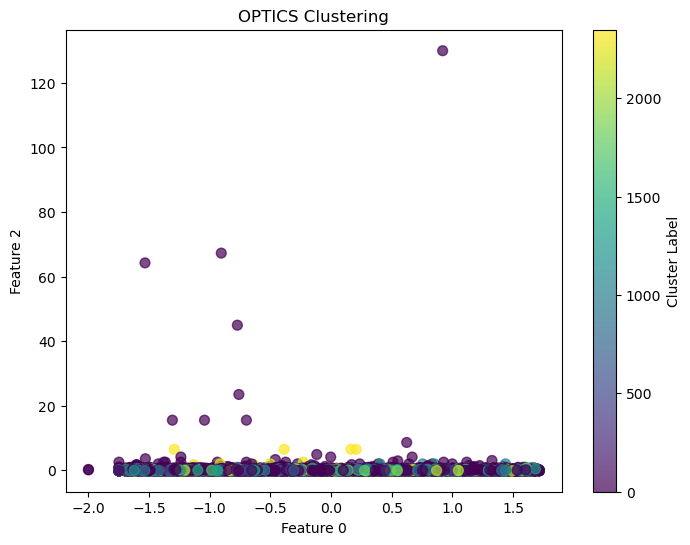

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=optics_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('OPTICS Clustering')
plt.xlabel('Feature 0')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

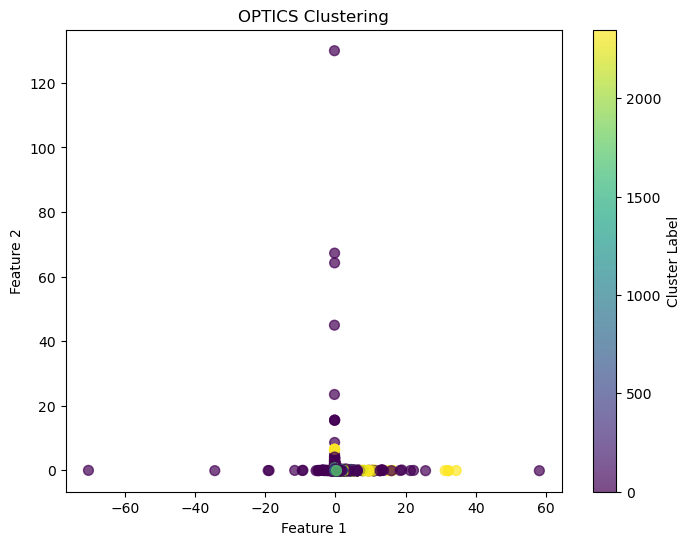

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=optics_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [76]:
random_data_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,Country_Encoded,KMeans_cluster,KMedoids_cluster,DBSCAN_cluster,HDBSCAN_cluster,OPTICS_cluster
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,2011,6,28,14,0,0,2,0,530,0
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,2010,11,16,12,0,2,1,1,-1,-1
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,2010,7,7,13,0,2,1,1,767,1583
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,2011,7,28,18,0,0,2,0,534,86
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,2011,10,26,16,0,0,2,0,1140,362


# Market Basket Analysis

In [77]:
drop_columns = ['KMeans_cluster', 'KMedoids_cluster', 'DBSCAN_cluster', 'HDBSCAN_cluster', 'OPTICS_cluster']
market_df = random_data_df.drop(drop_columns, axis=1)

In [78]:
market_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,Country_Encoded
242535,558355,84927F,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,2011,6,28,14,0
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,2010,11,16,12,0
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,2010,7,7,13,0
282972,561679,85099B,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,2011,7,28,18,0
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,2011,10,26,16,0
389867,526890,22383,LUNCH BAG SUKI DESIGN,10,2010-10-13 14:40:00,1.65,15032.0,2010,10,13,14,0
399872,527655,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-10-18 14:07:00,1.45,13387.0,2010,10,18,14,0
459242,575870,21616,4 PEAR BOTANICAL DINNER CANDLES,12,2011-11-11 12:46:00,1.25,15557.0,2011,11,11,12,0
275345,516161,21747,SMALL SKULL WINDMILL,1,2010-07-18 12:01:00,1.25,14563.0,2010,7,18,12,0
520799,537781,22837,HOT WATER BOTTLE BABUSHKA,1,2010-12-08 12:46:00,4.65,17341.0,2010,12,8,12,0


In [79]:
market_df.shape

(30000, 12)

In [80]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 242535 to 765
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Invoice          30000 non-null  object        
 1   StockCode        30000 non-null  object        
 2   Description      30000 non-null  object        
 3   Quantity         30000 non-null  int64         
 4   InvoiceDate      30000 non-null  datetime64[ns]
 5   Price            30000 non-null  float64       
 6   Customer ID      30000 non-null  float64       
 7   Year             30000 non-null  int64         
 8   Month            30000 non-null  int64         
 9   Day              30000 non-null  int64         
 10  Hour             30000 non-null  int64         
 11  Country_Encoded  30000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 3.0+ MB


In [81]:
customer_data = market_df.groupby('Customer ID').agg({
    'Quantity': 'sum',  # Total quantity purchased by each customer
    'Price': 'sum'      # Total amount spent by each customer
}).reset_index()

In [82]:
customer_data['PurchaseFrequency'] = market_df['Customer ID'].value_counts()
customer_data['AvgPurchaseValue'] = customer_data['Price'] / customer_data['PurchaseFrequency']
customer_data['LastPurchaseDate'] = market_df.groupby('Customer ID')['InvoiceDate'].max()
customer_data['DaysSinceLastPurchase'] = (pd.to_datetime('now') - customer_data['LastPurchaseDate']).dt.days

In [83]:
basket_size = market_df.groupby('Customer ID')['Quantity'].mean()
customer_data['BasketSize'] = basket_size

In [84]:
print(customer_data.head())

   Customer ID  Quantity   Price  PurchaseFrequency  AvgPurchaseValue  \
0      12346.0         6   11.99                NaN               NaN   
1      12745.0        24    0.55                NaN               NaN   
2      12746.0         6    2.10                NaN               NaN   
3      12747.0       130   41.36                NaN               NaN   
4      12748.0      1108  787.29                NaN               NaN   

  LastPurchaseDate  DaysSinceLastPurchase  BasketSize  
0              NaT                    NaN         NaN  
1              NaT                    NaN         NaN  
2              NaT                    NaN         NaN  
3              NaT                    NaN         NaN  
4              NaT                    NaN         NaN  


frequent_itemsets_apriori = apriori(market_df, min_support=0.05, use_colnames=True)

In [85]:
market_df['StockCode'] = market_df['StockCode'].astype(str)

In [86]:
letter_to_number = {'A': '1', 'B': '2', 'C': '3', 'D': '4', 'E': '5', 'F': '6', 
                    'G': '7', 'H': '8', 'I': '9', 'J': '10', 'K': '11', 'L': '12',
                    'M': '13', 'N': '14', 'O': '15', 'P': '16', 'Q': '17', 'R': '18',
                    'S': '19', 'T': '20', 'U': '21', 'V': '22', 'W': '23', 'X': '24',
                    'Y': '25', 'Z': '26'}

In [87]:
for letter, number in letter_to_number.items():
    market_df['StockCode'] = market_df['StockCode'].str.replace(letter, number)

In [88]:
market_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day,Hour,Country_Encoded
242535,558355,849276,PSYCHEDELIC TILE HOOK,2,2011-06-28 14:58:00,2.10,13614.0,2011,6,28,14,0
463274,533114,22175,PINK OWL SOFT TOY,1,2010-11-16 12:22:00,2.95,14675.0,2010,11,16,12,0
264779,514985,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-07-07 13:55:00,1.25,15494.0,2010,7,7,13,0
282972,561679,850992,JUMBO BAG RED RETROSPOT,10,2011-07-28 18:56:00,2.08,15245.0,2011,7,28,18,0
420862,572912,22362,GLASS JAR PEACOCK BATH SALTS,2,2011-10-26 16:07:00,2.95,16915.0,2011,10,26,16,0


In [89]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 242535 to 765
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Invoice          30000 non-null  object        
 1   StockCode        30000 non-null  object        
 2   Description      30000 non-null  object        
 3   Quantity         30000 non-null  int64         
 4   InvoiceDate      30000 non-null  datetime64[ns]
 5   Price            30000 non-null  float64       
 6   Customer ID      30000 non-null  float64       
 7   Year             30000 non-null  int64         
 8   Month            30000 non-null  int64         
 9   Day              30000 non-null  int64         
 10  Hour             30000 non-null  int64         
 11  Country_Encoded  30000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 3.0+ MB


In [90]:
basket = market_df.groupby(['Customer ID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Customer ID')


In [91]:
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

In [92]:
frequent_items_apriori = apriori(basket_encoded, min_support=0.001, use_colnames=True)

In [93]:
rules = association_rules(frequent_items_apriori, metric="lift", min_threshold=0.4)

In [94]:
print("Apriori Results:")
print(rules)

Apriori Results:
                  antecedents              consequents  antecedent support  \
0                     (20676)                  (20675)            0.004906   
1                     (20675)                  (20676)            0.004906   
2                     (20675)                  (21242)            0.004906   
3                     (21242)                  (20675)            0.004906   
4                     (20675)                  (22386)            0.004906   
5                     (22386)                  (20675)            0.017905   
6                     (20676)                  (20725)            0.004906   
7                     (20725)                  (20676)            0.022075   
8                     (20676)                  (21242)            0.004906   
9                     (21242)                  (20676)            0.004906   
10                    (20676)                  (22645)            0.004906   
11                    (22645)                  

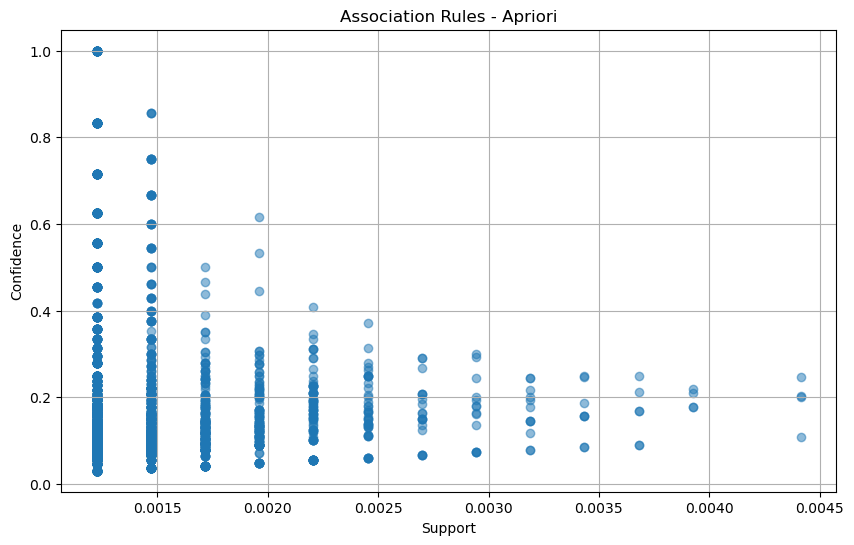

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Apriori')
plt.grid(True)
plt.show()

### FP Growth

In [97]:
market_df_filtered = market_df[['Customer ID', 'Quantity', 'Price']]

In [103]:
transaction_list = [['Purchase' if quantity > 0 else '', 'High_value_purchase' if price > 0 else ''] 
                    for quantity, price in zip(transactions['Quantity'], transactions['Price'])]


In [105]:
from mlxtend.preprocessing import TransactionEncoder

In [106]:
encoder = TransactionEncoder()

In [107]:
transaction_encoded = encoder.fit(transaction_list).transform(transaction_list)

In [108]:
transaction_df = pd.DataFrame(transaction_encoded, columns=encoder.columns_)

In [122]:
frequent_items_fp = fpgrowth(transaction_df, min_support=0.001, use_colnames=True)

In [126]:
rules_fp = association_rules(frequent_items_fp, metric="lift", min_threshold=0.8)


In [127]:
print(rules_fp)

             antecedents            consequents  antecedent support  \
0  (High_value_purchase)             (Purchase)            0.999755   
1             (Purchase)  (High_value_purchase)            0.986755   
2                     ()  (High_value_purchase)            0.013490   
3  (High_value_purchase)                     ()            0.999755   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.986755  0.986510    0.986752  0.999997 -0.000003    0.999755   
1            0.999755  0.986510    0.999751  0.999997 -0.000003    0.986755   
2            0.999755  0.013245    0.981818  0.982059 -0.000242    0.013490   
3            0.013490  0.013245    0.013248  0.982059 -0.000242    0.999755   

   zhangs_metric  
0      -0.013248  
1      -0.000249  
2      -0.018182  
3      -0.986752  


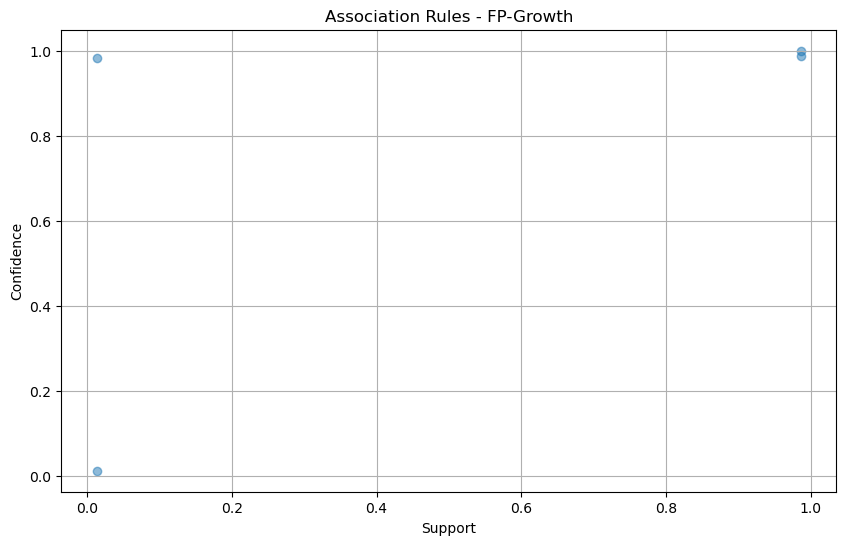

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(rules_fp['support'], rules_fp['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - FP-Growth')
plt.grid(True)
plt.show()